In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load MNIST DATA SET

In [4]:
#split the data. We have train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

In [5]:
print("Training data sample ", len (x_train))
print("Test data sample ",len(x_test))

print("Shape of training data ", x_train[0].shape)

Training data sample  60000
Test data sample  10000
Shape of training data  (28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Label:  5


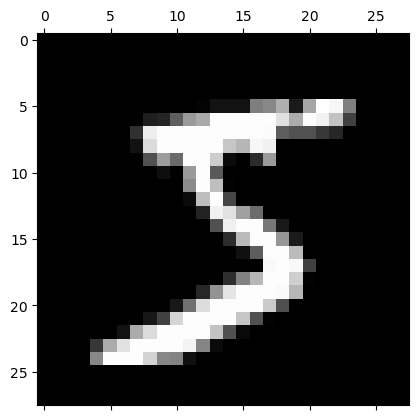

In [7]:
plt.matshow(x_train[0], cmap='gray') #x-train is the image data
print("Label: ", y_train[0]) #y-train is the label data or content of the image

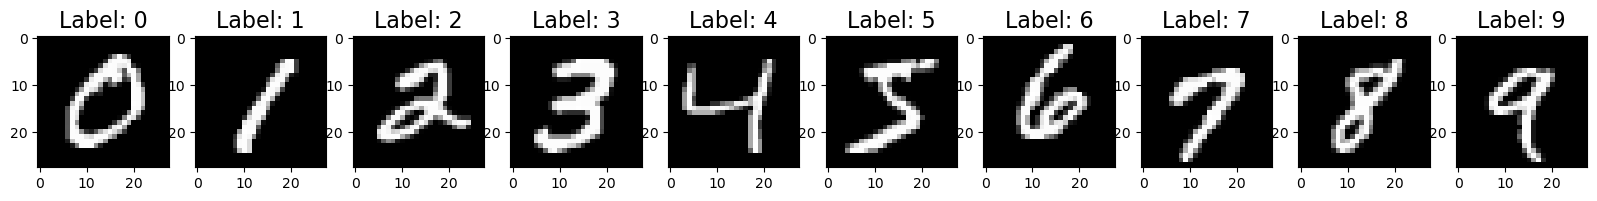

In [8]:
num_classes = 10
_ , ax = plt.subplots(1 , num_classes,figsize = (20,20))
for i in range(num_classes):
    sample = x_train[y_train == i][0]
# y_train == i creates a boolean mask. It is True where the label is i.
# x_train[y_train == i] selects all training images whose label is i.
#[0] picks the first image from that filtered set.
#So sample becomes one example image of digit i.
    ax[i].imshow(sample , cmap = "gray") #Displays that image on the i-th subplot using a grayscale colormap.
    ax[i].set_title(f'Label: {i}', fontsize=16) #Sets the title of the subplot to indicate which digit is being displayed.



In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0 
#scaling down to 0-1 range from 0-255

In [11]:
x_train.shape
y_train.shape

(60000,)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.2566
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1100
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9775 - loss: 0.0755
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0437
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9772 - loss: 0.0744


[0.07436805218458176, 0.9771999716758728]

In [23]:
predictions = model.predict(x_test)
predicted_labels = [np.argmax(p) for p in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


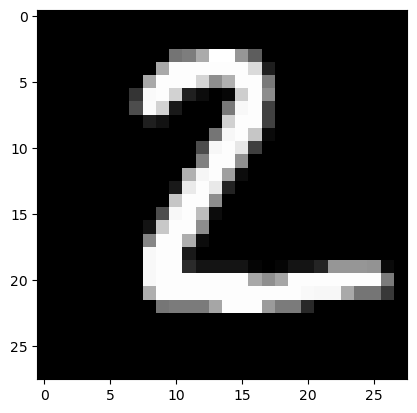

Predicted: 2
Actual:    2


In [25]:
plt.imshow(x_test[1], cmap='gray')
plt.show()

print("Predicted:", predicted_labels[1])
print("Actual:   ", y_test[1])